=== Top 5 Bahasa yang Terdeteksi ===
language
de          230
ko          415
unknown     415
en         4269
ja         5360
Name: count, dtype: int64

✅ Hasil disimpan ke 'yt_comments_with_language.csv'


C:\Users\azelf\AppData\Local\Temp\ipykernel_22488\1904639908.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


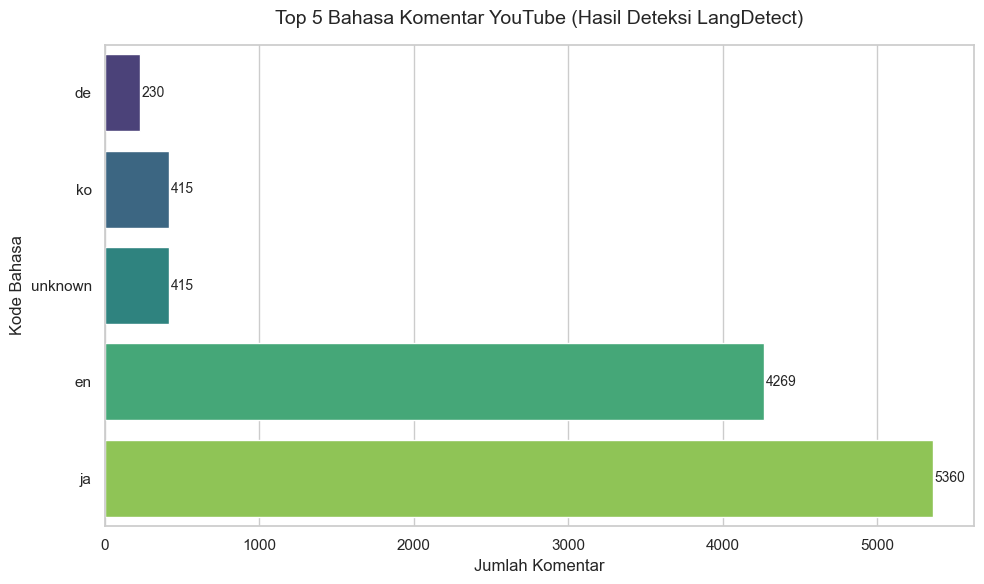

📊 Grafik Top 5 bahasa disimpan ke 'language_top5_horizontal.png'


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Konsistensi hasil deteksi
DetectorFactory.seed = 0

# Fungsi deteksi bahasa aman
def safe_detect(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

# === 1. Baca file komentar ===
df = pd.read_csv("yt_comments.csv")

# === 2. Deteksi bahasa tiap komentar ===
df['language'] = df['message'].astype(str).apply(safe_detect)

# === 3. Hitung jumlah bahasa ===
language_counts = df['language'].value_counts()
top5_langs = language_counts.head(5).sort_values()

print("=== Top 5 Bahasa yang Terdeteksi ===")
print(top5_langs)

# === 4. Simpan hasil ke file baru ===
df.to_csv("yt_comments_with_language.csv", index=False)
print("\n✅ Hasil disimpan ke 'yt_comments_with_language.csv'")

# === 5. Visualisasi Top 5 Bahasa ===
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(
    x=top5_langs.values,
    y=top5_langs.index,
    palette="viridis"
)

# === 6. Judul dan label ===
plt.title("Top 5 Bahasa Komentar YouTube (Hasil Deteksi LangDetect)", fontsize=14, pad=15)
plt.xlabel("Jumlah Komentar", fontsize=12)
plt.ylabel("Kode Bahasa", fontsize=12)

# Tampilkan nilai di ujung bar
for index, value in enumerate(top5_langs.values):
    plt.text(value + 10, index, str(value), va='center', fontsize=10)

plt.tight_layout()
plt.savefig("language_top5_horizontal.png", dpi=300)
plt.show()

print("📊 Grafik Top 5 bahasa disimpan ke 'language_top5_horizontal.png'")
